In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Load and Normalize Laspeyres Fixed Weight Index 

For each Class $t$ $=$ $2022$-$03$ and $t_0$ $=$ $2021$-$02$

In [4]:
d = {'race':['white','asian','black'],
     'race_value':[0.0973671720366758,0.0898972409466823,0.0993477084650276]}
df_race = pd.DataFrame(d)
df_race["race_value"] = scaler.fit_transform(np.array(df_race['race_value']).reshape(-1, 1)) 
df_race

,race,race_value
0,white,0.79043
1,asian,0.00000
2,black,1.00000


In [5]:
d = {'region':['northeast','midwest', 'south', 'west'], 
     'region_value':[1.09160600192193,1.0992645606691,1.09973391609147,1.09632958546209]}
df_region = pd.DataFrame(d)
df_region["region_value"] = scaler.fit_transform(np.array(df_region['region_value']).reshape(-1, 1))
df_region

,region,region_value
0,northeast,0.000000
1,midwest,0.942254
2,south,1.000000
3,west,0.581156


In [6]:
d = {'age':['u25','25_34', '35_44', '45_54','55_64','65_74','o75'], 
     'age_value':[1.103176431,1.101738824,1.100439555,1.097813897
                  ,1.096675707,1.093607266,1.083242763]}
df_age = pd.DataFrame(d)
df_age["age_value"] = scaler.fit_transform(np.array(df_age['age_value']).reshape(-1, 1))
df_age

,age,age_value
0,u25,1.000000
1,25_34,0.927880
2,35_44,0.862701
3,45_54,0.730981
4,55_64,0.673882
5,65_74,0.519950
6,o75,0.000000


In [7]:
d = {'occupation':['managers','tech_sales', 'service', 'construction','operators','retired'], 
     'occupation_value':[1.096140778,1.100362962,1.102762348,1.107421248,1.107130684,1.090826376]}
df_occupation = pd.DataFrame(d)
df_occupation["occupation_value"] = scaler.fit_transform(np.array(df_occupation['occupation_value']).reshape(-1, 1))
df_occupation

,occupation,occupation_value
0,managers,0.320244
1,tech_sales,0.574671
2,service,0.719257
3,construction,1.000000
4,operators,0.982491
5,retired,0.000000


# Combine Groups

In [8]:
from itertools import product
df_comb = pd.DataFrame(list(product(list(df_race.race),
                                    list(df_region.region),
                                    list(df_age.age),
                                    list(df_occupation.occupation)                                
                            )
                        ), columns = ["race","region","age","occupation"])

In [9]:
df_comb.head()

,race,region,age,occupation
0,white,northeast,u25,managers
1,white,northeast,u25,tech_sales
2,white,northeast,u25,service
3,white,northeast,u25,construction
4,white,northeast,u25,operators


In [10]:
assert(len(df_comb) == len(df_race)*len(df_region)*
                       len(df_age)*len(df_occupation))#*len(df_income))

In [11]:
df_comb= df_comb.merge(df_race, how = "left" , on="race").\
                 merge(df_region, how = "left" , on="region").\
                 merge(df_age, how = "left" , on="age").\
                 merge(df_occupation, how = "left" , on="occupation")#.\
#                 merge(df_income, how = "left" , on="income")

In [12]:
df_comb.head()

,race,region,age,occupation,race_value,region_value,age_value,occupation_value
0,white,northeast,u25,managers,0.79043,0.0,1.0,0.320244
1,white,northeast,u25,tech_sales,0.79043,0.0,1.0,0.574671
2,white,northeast,u25,service,0.79043,0.0,1.0,0.719257
3,white,northeast,u25,construction,0.79043,0.0,1.0,1.000000
4,white,northeast,u25,operators,0.79043,0.0,1.0,0.982491


# Calculate Combined Index

In [13]:
df_comb['mean_value'] = df_comb.filter(like='_value').mean(axis=1)

In [14]:
df_comb = df_comb.sort_values("mean_value", ascending=False)

In [15]:
df_comb.head()

,race,region,age,occupation,race_value,region_value,age_value,occupation_value,mean_value
423,black,south,u25,construction,1.0,1.000000,1.00000,1.000000,1.000000
424,black,south,u25,operators,1.0,1.000000,1.00000,0.982491,0.995623
381,black,midwest,u25,construction,1.0,0.942254,1.00000,1.000000,0.985563
429,black,south,25_34,construction,1.0,1.000000,0.92788,1.000000,0.981970
382,black,midwest,u25,operators,1.0,0.942254,1.00000,0.982491,0.981186


In [16]:
df_comb.to_excel("dataset_combination_2.xlsx", index=False)

# Plot top 20

In [44]:
df = df_comb.head(20)

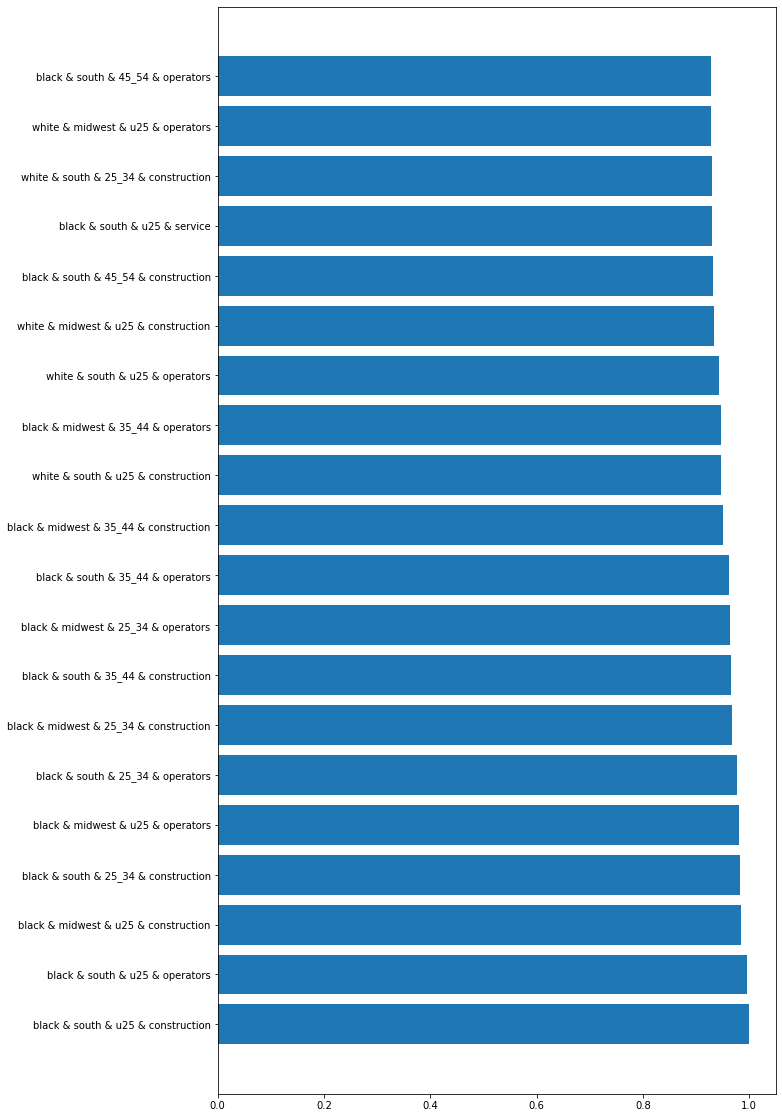

In [45]:
fig = plt.figure(figsize = (10, 20))
plt.barh(df["race"] + " & " + df["region"] + " & " + df["age"] + " & " + df["occupation"]
        , df["mean_value"])
plt.show()

# Plot bottom 20

In [42]:
df = df_comb.tail(20)

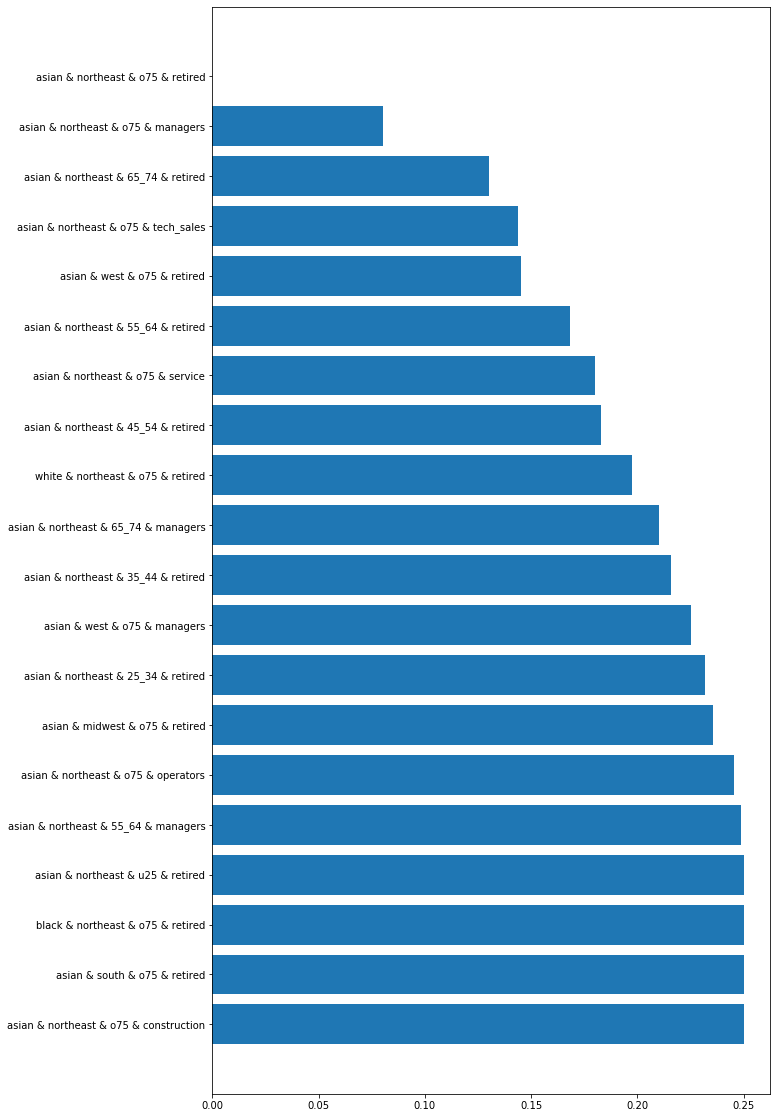

In [43]:
fig = plt.figure(figsize = (10, 20))
plt.barh(df["race"] + " & " + df["region"] + " & " + df["age"] + " & " + df["occupation"]
        , df["mean_value"])
plt.show()

# Kmeans 3 classi

In [21]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(np.array(df_comb["mean_value"]).reshape(-1, 1))

In [22]:
kmeans.cluster_centers_

array([[0.61216197],
       [0.83028786],
       [0.36895567]])

In [23]:
df_comb["cluster"] = kmeans.labels_

In [24]:
df_comb.groupby("cluster").count()

,race,region,age,occupation,race_value,region_value,age_value,occupation_value,mean_value
cluster,,,,,,,,,
0,218,218,218,218,218,218,218,218,218
1,165,165,165,165,165,165,165,165,165
2,121,121,121,121,121,121,121,121,121


In [25]:
df_comb[df_comb["cluster"]==1].race.value_counts()

black    91
white    68
asian     6
Name: race, dtype: int64

In [26]:
df_comb[df_comb["cluster"]==1].region.value_counts()

south        64
midwest      60
west         37
northeast     4
Name: region, dtype: int64

In [27]:
df_comb[df_comb["cluster"]==1].age.value_counts()

u25      37
25_34    32
35_44    27
45_54    24
55_64    23
65_74    18
o75       4
Name: age, dtype: int64

In [28]:
df_comb[df_comb["cluster"]==1].occupation.value_counts()

construction    43
operators       42
service         32
tech_sales      28
managers        17
retired          3
Name: occupation, dtype: int64

# Kmeans 5 classi

In [29]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(np.array(df_comb["mean_value"]).reshape(-1, 1))

In [30]:
kmeans.cluster_centers_

array([[0.87205848],
       [0.44522996],
       [0.5908422 ],
       [0.71407614],
       [0.25384489]])

In [31]:
df_comb["cluster"] = kmeans.labels_

In [32]:
df_comb.groupby("cluster").count()

,race,region,age,occupation,race_value,region_value,age_value,occupation_value,mean_value
cluster,,,,,,,,,
0,107,107,107,107,107,107,107,107,107
1,104,104,104,104,104,104,104,104,104
2,122,122,122,122,122,122,122,122,122
3,130,130,130,130,130,130,130,130,130
4,41,41,41,41,41,41,41,41,41


In [41]:
for type_var in ["race","region","age","occupation"]:
    for i in range(5):
        cl_pov = ""
        if i == 0:
            cl_pov = "molto colpiti"
        elif i ==1:
            cl_pov = "mediamente poco colpiti"
        elif i == 2:
            cl_pov = "medio"
        elif i == 3:
            cl_pov = "mediamente molto colpiti"
        else:
            cl_pov = "poco colpiti"
        print(type_var + " " + cl_pov + ":")
        print(df_comb[df_comb["cluster"]==i][type_var].value_counts())

race molto colpiti:
black    63
white    44
Name: race, dtype: int64
race mediamente poco colpiti:
asian    64
white    23
black    17
Name: race, dtype: int64
race medio:
asian    48
white    41
black    33
Name: race, dtype: int64
race mediamente molto colpiti:
white    55
black    53
asian    22
Name: race, dtype: int64
race poco colpiti:
asian    34
white     5
black     2
Name: race, dtype: int64
region molto colpiti:
south      46
midwest    43
west       18
Name: region, dtype: int64
region mediamente poco colpiti:
northeast    48
west         24
midwest      17
south        15
Name: region, dtype: int64
region medio:
west         41
northeast    31
midwest      26
south        24
Name: region, dtype: int64
region mediamente molto colpiti:
south        39
midwest      38
west         35
northeast    18
Name: region, dtype: int64
region poco colpiti:
northeast    29
west          8
south         2
midwest       2
Name: region, dtype: int64
age molto colpiti:
u25      23
25_34    

In [33]:
df_comb[df_comb["cluster"]==0].race.value_counts()

black    63
white    44
Name: race, dtype: int64

In [34]:
df_comb[df_comb["cluster"]==0].region.value_counts()

south      46
midwest    43
west       18
Name: region, dtype: int64

In [35]:
df_comb[df_comb["cluster"]==0].age.value_counts()

u25      23
25_34    23
35_44    20
45_54    16
55_64    15
65_74    10
Name: age, dtype: int64

In [36]:
df_comb[df_comb["cluster"]==0].occupation.value_counts()

construction    32
operators       32
service         23
tech_sales      15
managers         5
Name: occupation, dtype: int64